In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import Union, Tuple, List
import pandas as pd
from pygam import LogisticGAM
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from pathlib import Path
from src.data_preprocessing.create_data_split import split_data, dummy_encoder
from src.modeling.training import training, get_model
from src.utils.pdp import get_underscore, ohe_filter, categorical_partial_dependence


In [2]:
data_path = "C:\\fairness_project\\project-fairness-interpretability\\data\\data.csv"
data = pd.read_csv(data_path)

In [3]:
CAT_COLS = ["Color", "Gender", "Make", "Race", "VehicleType"]
TRAIN_SIZE = 0.6
TEST_FROM_VAL = 0.5
RANDOM_STATE = 42


new_data = split_data(cols=CAT_COLS, df=data, train_size=TRAIN_SIZE, test_size=TEST_FROM_VAL, random_state=RANDOM_STATE)

In [4]:
X_train = new_data["train"][0]
Y_train = new_data["train"][1]
X_test = new_data["test"][0]

In [8]:
cols = X_train.columns.values.tolist()
underscore =  get_underscore(cols)
underscore_cols = underscore[0]
non_underscore_cols = underscore[1]
ohe_results = ohe_filter(non_underscore_cols, underscore_cols)
non_ohe = ohe_results[0]
ohe= ohe_results[1]
numerical = [["Year"]]
non_ohe.remove(["Year"])

In [30]:
model = training("Random Forest",X_train, Y_train)

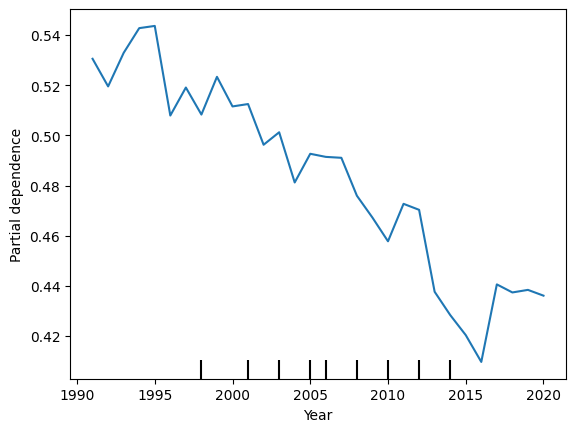

In [31]:
display = PartialDependenceDisplay.from_estimator(
     model,X_test, features=numerical[0]
      )

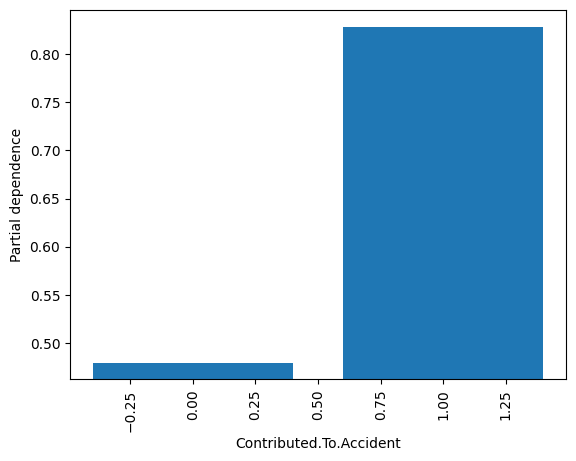

In [32]:
Contributed_To_Accident = PartialDependenceDisplay.from_estimator(model, X_test, features=non_ohe[2], categorical_features=non_ohe[2])

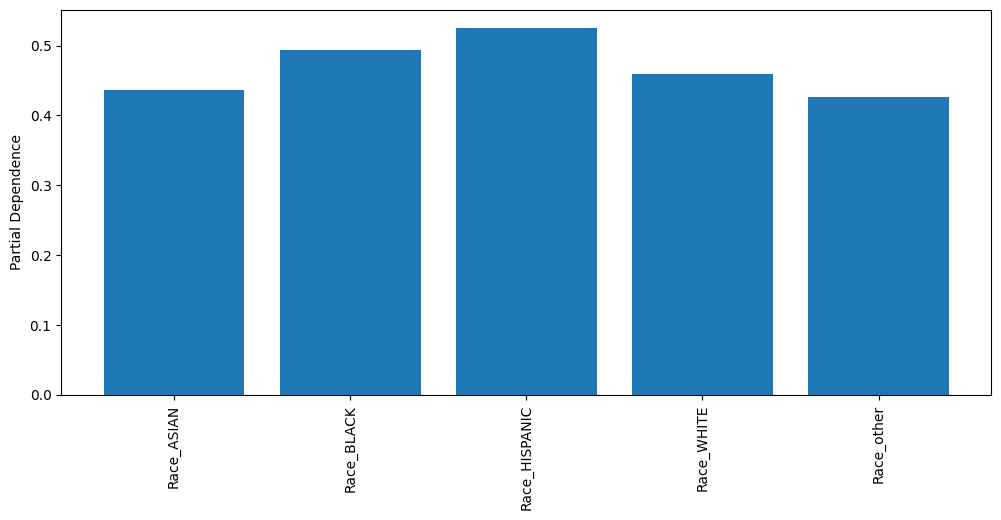

In [33]:
categorical_partial_dependence(model, X_test, feature_names=ohe[3], figure_size=(12,5))